In [20]:
#Matthew Ewert
#801232199
#Homework2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)

features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_1a = 'price'

X_1a = df[features_1a]
y_1a = df[target_1a]
# randomize
X_train_1a, X_test_1a, y_train_1a, y_test_1a = train_test_split(X_1a, y_1a, test_size=0.2, random_state=42, shuffle=True)

# normalize
X_train_1a = (X_train_1a - X_train_1a.mean()) / X_train_1a.std()
X_test_1a = (X_test_1a - X_test_1a.mean()) / X_test_1a.std()

X_train_1a = np.c_[np.ones(X_train_1a.shape[0]), X_train_1a]
X_test_1a = np.c_[np.ones(X_test_1a.shape[0]), X_test_1a]

# grad descent
def gradient_descent_1a(X_train_1a, y_train_1a, X_val_1a, y_val_1a, theta_1a, alpha_1a, iterations_1a):
    m_train = len(y_train_1a)
    m_val = len(y_val_1a)

    training_loss_history_1a = []
    validation_loss_history_1a = []

    for i in range(iterations_1a):
        prediction_train_1a = X_train_1a.dot(theta_1a)
        error_train_1a = prediction_train_1a - y_train_1a

        theta_1a = theta_1a - (alpha_1a/m_train) * X_train_1a.T.dot(error_train_1a)

        training_loss_1a = (1/(2*m_train)) * np.sum(error_train_1a ** 2)
        training_loss_history_1a.append(training_loss_1a)

        prediction_val_1a = X_val_1a.dot(theta_1a)
        error_val_1a = prediction_val_1a - y_val_1a
        validation_loss_1a = (1/(2*m_val)) * np.sum(error_val_1a ** 2)
        validation_loss_history_1a.append(validation_loss_1a)

    return theta_1a, training_loss_history_1a, validation_loss_history_1a

learning_rates_1a = [0.1, 0.05, 0.01]
iterations_1a = 1000

training_loss_histories_1a = {}
validation_loss_histories_1a = {}

for alpha_1a in learning_rates_1a:
    theta_1a = np.zeros(X_train_1a.shape[1])

    theta_1a, train_loss_1a, val_loss_1a = gradient_descent_1a(X_train_1a, y_train_1a, X_test_1a, y_test_1a, theta_1a, alpha_1a, iterations_1a)

    training_loss_histories_1a[alpha_1a] = train_loss_1a
    validation_loss_histories_1a[alpha_1a] = val_loss_1a



for alpha_1a in learning_rates_1a:
    final_train_loss_1a = training_loss_histories_1a[alpha_1a][-1]
    final_val_loss_1a = validation_loss_histories_1a[alpha_1a][-1]
    print(f"1a Final Training Loss (alpha={alpha_1a}): {final_train_loss_1a}")
    print(f"1a Final Validation Loss(alpha={alpha_1a}): {final_val_loss_1a}")


1a Final Training Loss (alpha=0.1): 675004105663.2902
1a Final Validation Loss(alpha=0.1): 1187499161097.7822
1a Final Training Loss (alpha=0.05): 675004105663.2902
1a Final Validation Loss(alpha=0.05): 1187499161097.7864
1a Final Training Loss (alpha=0.01): 675004526357.2258
1a Final Validation Loss(alpha=0.01): 1187606131345.9973


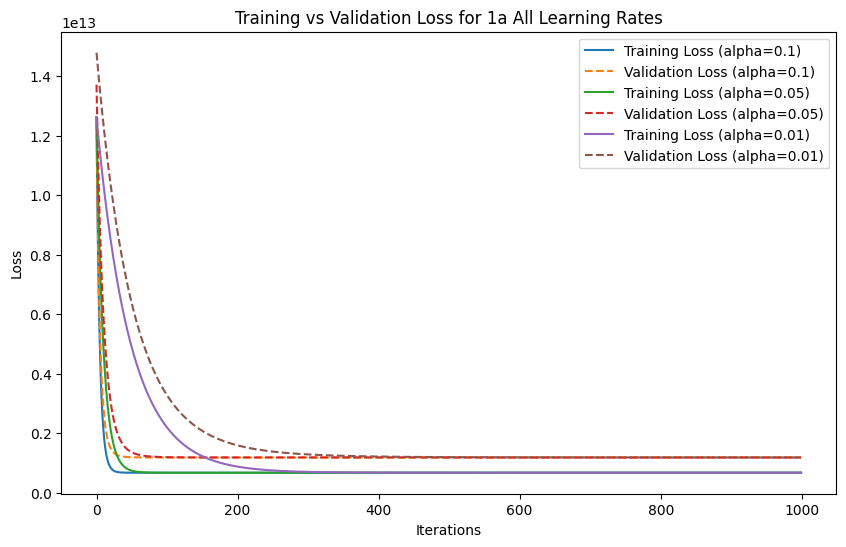

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.figure(figsize=(10,6))

for alpha_1a in learning_rates_1a:
    plt.plot(range(iterations_1a), training_loss_histories_1a[alpha_1a], label=f'Training Loss (alpha={alpha_1a})')
    plt.plot(range(iterations_1a), validation_loss_histories_1a[alpha_1a], linestyle='--', label=f'Validation Loss (alpha={alpha_1a})')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss for 1a All Learning Rates')
plt.legend()
plt.show()


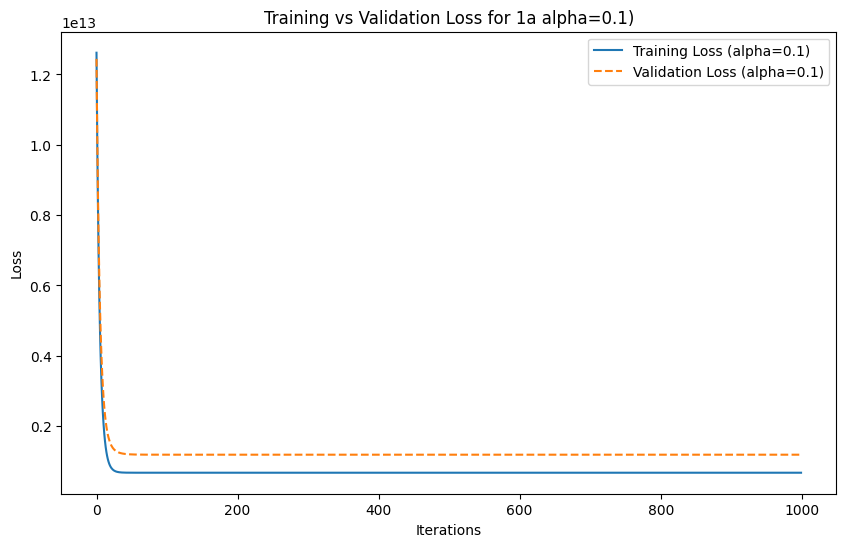

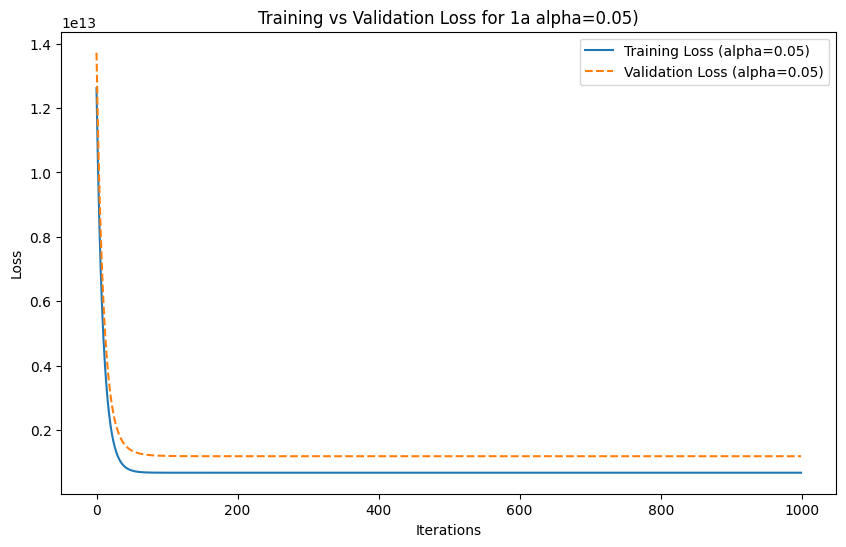

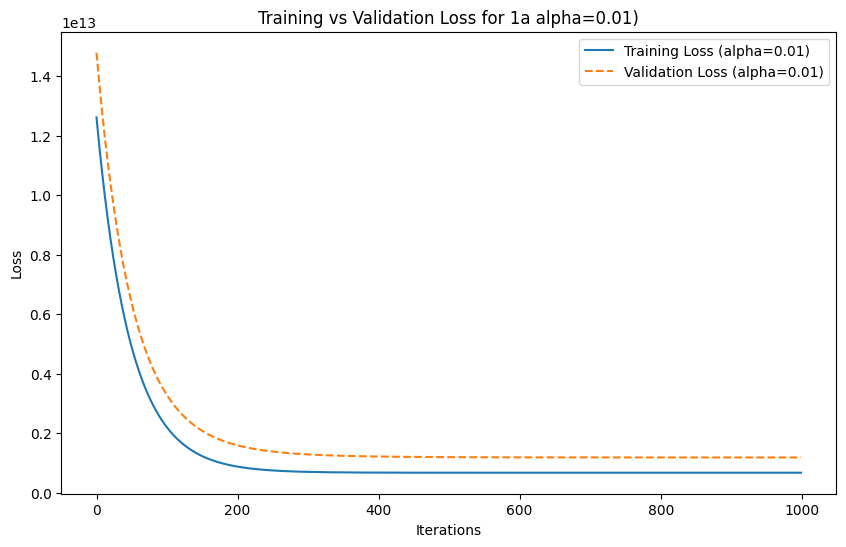

In [22]:
# individual graphs 1a
for alpha_1a in learning_rates_1a:
    plt.figure(figsize=(10,6))
    plt.plot(range(iterations_1a), training_loss_histories_1a[alpha_1a], label=f'Training Loss (alpha={alpha_1a})')
    plt.plot(range(iterations_1a), validation_loss_histories_1a[alpha_1a], linestyle='--', label=f'Validation Loss (alpha={alpha_1a})')

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training vs Validation Loss for 1a alpha={alpha_1a})')
    plt.legend()
    plt.show()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)

df = pd.get_dummies(df, drop_first=True)

features_1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes',
               'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target_1b = 'price'

X_1b = df[features_1b]
y_1b = df[target_1b]

# random values
X_train_1b, X_test_1b, y_train_1b, y_test_1b = train_test_split(X_1b, y_1b, test_size=0.2, random_state=42, shuffle=True)

# normalize
X_train_1b = (X_train_1b - X_train_1b.mean()) / X_train_1b.std()
X_test_1b = (X_test_1b - X_test_1b.mean()) / X_test_1b.std()

X_train_1b = np.c_[np.ones(X_train_1b.shape[0]), X_train_1b]
X_test_1b = np.c_[np.ones(X_test_1b.shape[0]), X_test_1b]

# grad descent 1b
def gradient_descent_1b(X_train_1b, y_train_1b, X_val_1b, y_val_1b, theta_1b, alpha_1b, iterations_1b):
    m_train = len(y_train_1b)
    m_val = len(y_val_1b)

    training_loss_history_1b = []
    validation_loss_history_1b = []

    for i in range(iterations_1b):
        prediction_train_1b = X_train_1b.dot(theta_1b)
        error_train_1b = prediction_train_1b - y_train_1b

        theta_1b = theta_1b - (alpha_1b/m_train) * X_train_1b.T.dot(error_train_1b)

        training_loss_1b = (1/(2*m_train)) * np.sum(error_train_1b ** 2)
        training_loss_history_1b.append(training_loss_1b)

        prediction_val_1b = X_val_1b.dot(theta_1b)
        error_val_1b = prediction_val_1b - y_val_1b
        validation_loss_1b = (1/(2*m_val)) * np.sum(error_val_1b ** 2)
        validation_loss_history_1b.append(validation_loss_1b)

    return theta_1b, training_loss_history_1b, validation_loss_history_1b

learning_rates_1b = [0.1, 0.05, 0.01]
iterations_1b = 1000

training_loss_histories_1b = {}
validation_loss_histories_1b = {}

for alpha_1b in learning_rates_1b:
    theta_1b = np.zeros(X_train_1b.shape[1])

    theta_1b, train_loss_1b, val_loss_1b = gradient_descent_1b(X_train_1b, y_train_1b, X_test_1b, y_test_1b, theta_1b, alpha_1b, iterations_1b)

    training_loss_histories_1b[alpha_1b] = train_loss_1b
    validation_loss_histories_1b[alpha_1b] = val_loss_1b

for alpha_1b in learning_rates_1b:
    final_train_loss_1b = training_loss_histories_1b[alpha_1b][-1]
    final_val_loss_1b = validation_loss_histories_1b[alpha_1b][-1]
    print(f"1b Final Training Loss (alpha={alpha_1b}): {final_train_loss_1b}")
    print(f"1b Final Validation Loss (alpha={alpha_1b}): {final_val_loss_1b}")


1b Final Training Loss (alpha=0.1): 496240500004.89264
1b Final Validation Loss (alpha=0.1): 929089619127.8059
1b Final Training Loss (alpha=0.05): 496240500004.89264
1b Final Validation Loss (alpha=0.05): 929089619099.891
1b Final Training Loss (alpha=0.01): 496244653920.63556
1b Final Validation Loss (alpha=0.01): 928839751405.8401


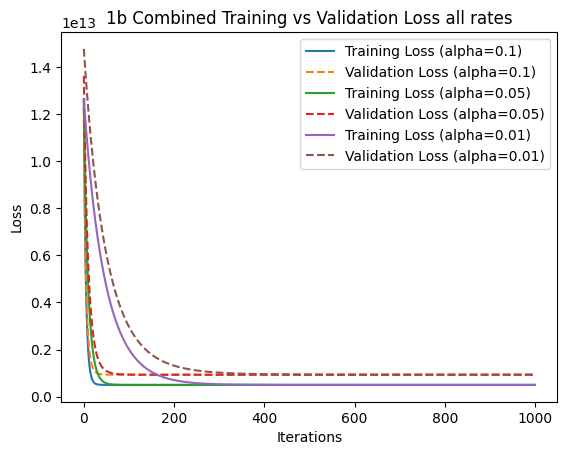

In [24]:
for alpha_1b in learning_rates_1b:
    plt.plot(range(iterations_1b), training_loss_histories_1b[alpha_1b], label=f'Training Loss (alpha={alpha_1b})')
    plt.plot(range(iterations_1b), validation_loss_histories_1b[alpha_1b], linestyle='--', label=f'Validation Loss (alpha={alpha_1b})')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1b Combined Training vs Validation Loss all rates')
plt.legend()
plt.show()

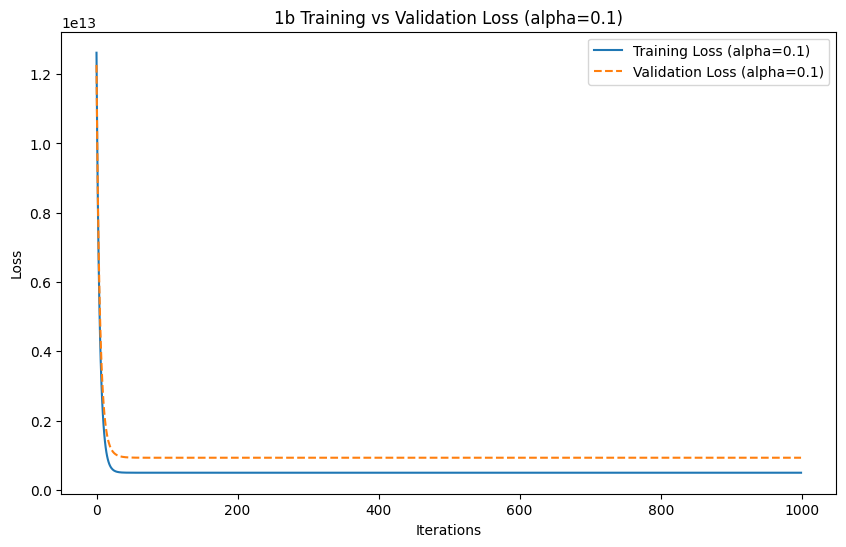

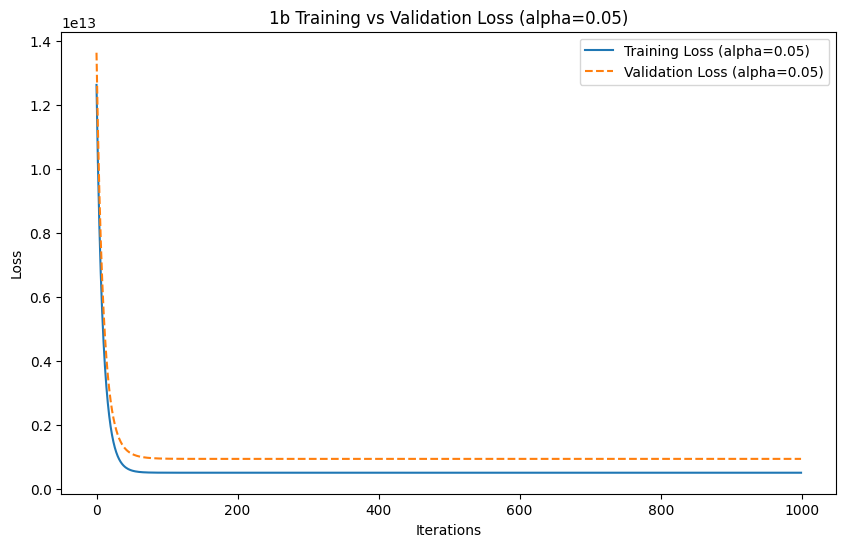

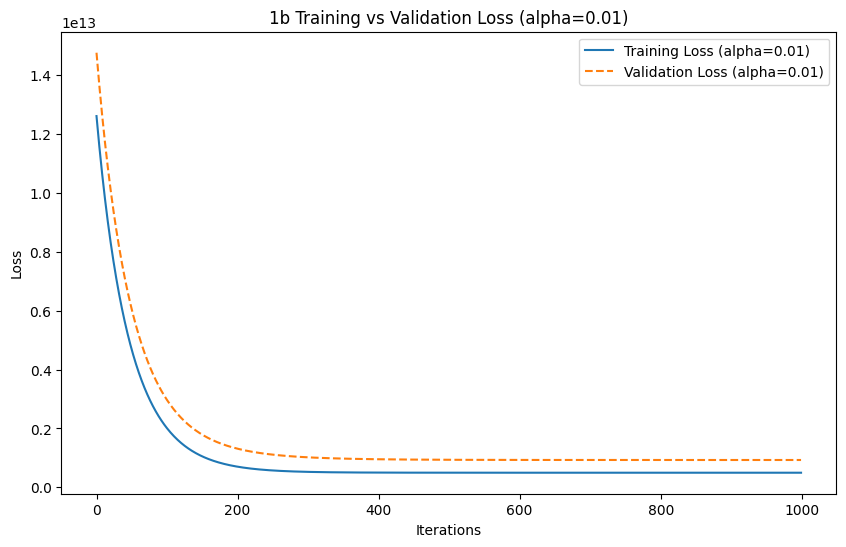

In [25]:
# Plot the results for Problem 1b, with separate graphs for each learning rate
for alpha_1b in learning_rates_1b:
    plt.figure(figsize=(10,6))  # Create a new figure for each learning rate
    plt.plot(range(iterations_1b), training_loss_histories_1b[alpha_1b], label=f'Training Loss (alpha={alpha_1b})')
    plt.plot(range(iterations_1b), validation_loss_histories_1b[alpha_1b], linestyle='--', label=f'Validation Loss (alpha={alpha_1b})')

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'1b Training vs Validation Loss (alpha={alpha_1b})')
    plt.legend()
    plt.show()

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)

features_2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_2a = 'price'

X_2a = df[features_2a]
y_2a = df[target_2a]

X_train_2a, X_test_2a, y_train_2a, y_test_2a = train_test_split(X_2a, y_2a, test_size=0.2, random_state=42, shuffle=True)

# normalization
scaler_norm = MinMaxScaler()

X_train_norm = scaler_norm.fit_transform(X_train_2a)
X_test_norm = scaler_norm.transform(X_test_2a)

X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_test_norm = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]

# standardization
scaler_std = StandardScaler()

X_train_std = scaler_std.fit_transform(X_train_2a)
X_test_std = scaler_std.transform(X_test_2a)

X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_test_std = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

# 2a grad descent
def gradient_descent_2a(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m_train = len(y_train)
    m_val = len(y_val)

    training_loss_history = []
    validation_loss_history = []

    for i in range(iterations):
        prediction_train = X_train.dot(theta)
        error_train = prediction_train - y_train

        theta = theta - (alpha/m_train) * X_train.T.dot(error_train)

        training_loss = (1/(2*m_train)) * np.sum(error_train ** 2)
        training_loss_history.append(training_loss)

        prediction_val = X_val.dot(theta)
        error_val = prediction_val - y_val
        validation_loss = (1/(2*m_val)) * np.sum(error_val ** 2)
        validation_loss_history.append(validation_loss)

    return theta, training_loss_history, validation_loss_history

theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

alpha = 0.01
iterations = 1000

theta_norm, training_loss_norm, validation_loss_norm = gradient_descent_2a(X_train_norm, y_train_2a, X_test_norm, y_test_2a, theta_norm, alpha, iterations)

theta_std, training_loss_std, validation_loss_std = gradient_descent_2a(X_train_std, y_train_2a, X_test_std, y_test_2a, theta_std, alpha, iterations)



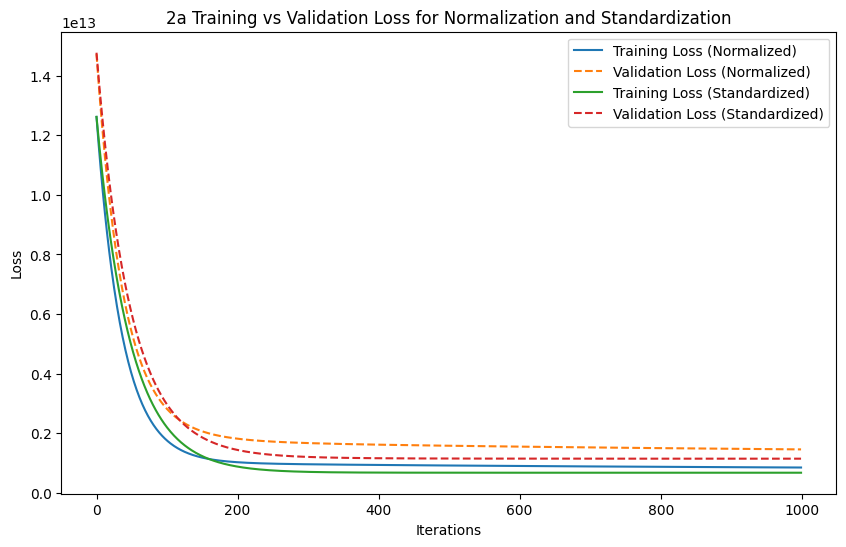

Final Training Loss (Normalized): 849853535885.0492
Final Validation Loss (Normalized): 1458033578362.7144
Final Training Loss (Standardized): 675004515781.6664
Final Validation Loss (Standardized): 1146408168889.5422
Final Training Loss (Baseline - Problem 1a): 675004526357.2258
Final Validation Loss (Baseline - Problem 1a): 1187606131345.9973


In [27]:

plt.figure(figsize=(10,6))

plt.plot(range(iterations), training_loss_norm, label='Training Loss (Normalized)')
plt.plot(range(iterations), validation_loss_norm, linestyle='--', label='Validation Loss (Normalized)')

plt.plot(range(iterations), training_loss_std, label='Training Loss (Standardized)')
plt.plot(range(iterations), validation_loss_std, linestyle='--', label='Validation Loss (Standardized)')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2a Training vs Validation Loss for Normalization and Standardization')
plt.legend()
plt.show()

print(f"Final Training Loss (Normalized): {training_loss_norm[-1]}")
print(f"Final Validation Loss (Normalized): {validation_loss_norm[-1]}")

print(f"Final Training Loss (Standardized): {training_loss_std[-1]}")
print(f"Final Validation Loss (Standardized): {validation_loss_std[-1]}")

print(f"Final Training Loss (Baseline - Problem 1a): {final_train_loss_1a}")
print(f"Final Validation Loss (Baseline - Problem 1a): {final_val_loss_1a}")


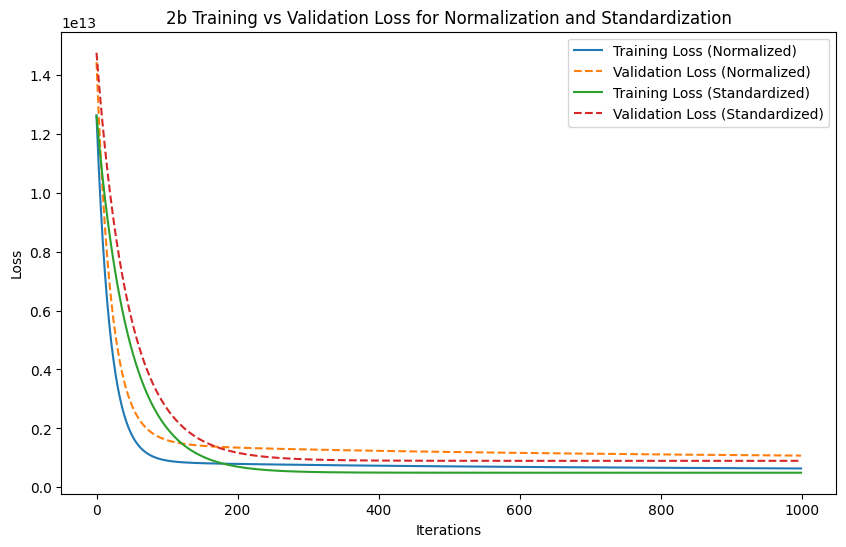

Final Training Loss (Normalized): 641042597835.9674
Final Validation Loss (Normalized): 1077541865435.6566
Final Training Loss (Standardized): 496244577550.51044
Final Validation Loss (Standardized): 900111363844.0188
Final Training Loss (Baseline - Problem 1b): 496244653920.63556
Final Validation Loss (Baseline - Problem 1b): 928839751405.8401


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)

df = pd.get_dummies(df, drop_first=True)

features_2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes',
               'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target_2b = 'price'

X_2b = df[features_2b]
y_2b = df[target_2b]

# random  split
X_train_2b, X_test_2b, y_train_2b, y_test_2b = train_test_split(X_2b, y_2b, test_size=0.2, random_state=42, shuffle=True)

# normalization
scaler_norm = MinMaxScaler()

X_train_norm = scaler_norm.fit_transform(X_train_2b)
X_test_norm = scaler_norm.transform(X_test_2b)

X_train_norm = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_test_norm = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]

# standardization
scaler_std = StandardScaler()

X_train_std = scaler_std.fit_transform(X_train_2b)
X_test_std = scaler_std.transform(X_test_2b)

X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_test_std = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

# 2b grad descent
def gradient_descent_2b(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m_train = len(y_train)
    m_val = len(y_val)

    training_loss_history = []
    validation_loss_history = []

    for i in range(iterations):
        prediction_train = X_train.dot(theta)
        error_train = prediction_train - y_train

        theta = theta - (alpha/m_train) * X_train.T.dot(error_train)

        training_loss = (1/(2*m_train)) * np.sum(error_train ** 2)
        training_loss_history.append(training_loss)

        prediction_val = X_val.dot(theta)
        error_val = prediction_val - y_val
        validation_loss = (1/(2*m_val)) * np.sum(error_val ** 2)
        validation_loss_history.append(validation_loss)

    return theta, training_loss_history, validation_loss_history

theta_norm = np.zeros(X_train_norm.shape[1])
theta_std = np.zeros(X_train_std.shape[1])

alpha = 0.01
iterations = 1000

theta_norm, training_loss_norm, validation_loss_norm = gradient_descent_2b(X_train_norm, y_train_2b, X_test_norm, y_test_2b, theta_norm, alpha, iterations)

theta_std, training_loss_std, validation_loss_std = gradient_descent_2b(X_train_std, y_train_2b, X_test_std, y_test_2b, theta_std, alpha, iterations)

plt.figure(figsize=(10,6))

plt.plot(range(iterations), training_loss_norm, label='Training Loss (Normalized)')
plt.plot(range(iterations), validation_loss_norm, linestyle='--', label='Validation Loss (Normalized)')

plt.plot(range(iterations), training_loss_std, label='Training Loss (Standardized)')
plt.plot(range(iterations), validation_loss_std, linestyle='--', label='Validation Loss (Standardized)')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2b Training vs Validation Loss for Normalization and Standardization')
plt.legend()
plt.show()

print(f"Final Training Loss (Normalized): {training_loss_norm[-1]}")
print(f"Final Validation Loss (Normalized): {validation_loss_norm[-1]}")

print(f"Final Training Loss (Standardized): {training_loss_std[-1]}")
print(f"Final Validation Loss (Standardized): {validation_loss_std[-1]}")

print(f"Final Training Loss (Baseline - Problem 1b): {final_train_loss_1b}")
print(f"Final Validation Loss (Baseline - Problem 1b): {final_val_loss_1b}")


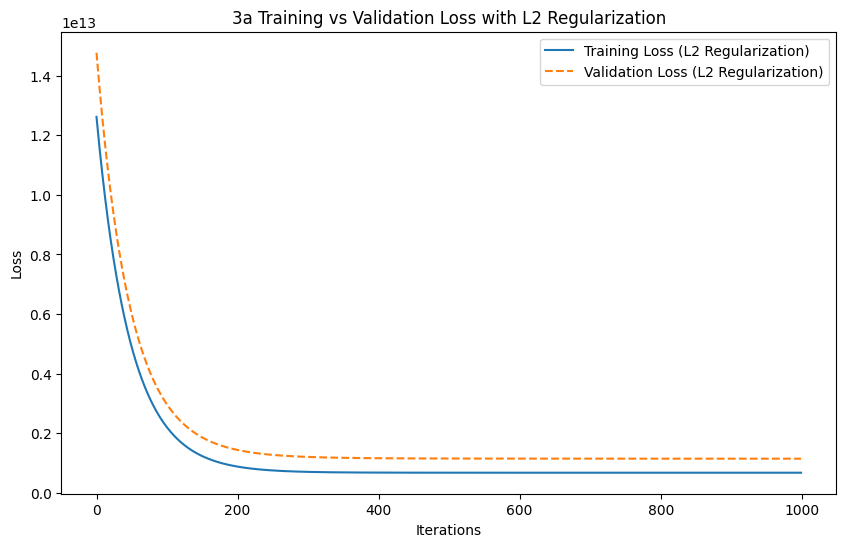

Final Training Loss (L2 Regularization): 675126644539.807
Final Validation Loss (L2 Regularization): 1146586052497.2175
Final Training Loss (Baseline - Problem 2a): 496244577550.51044
Final Validation Loss (Baseline - Problem 2a): 900111363844.0188


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)

features_3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target_3a = 'price'

X_3a = df[features_3a]
y_3a = df[target_3a]

X_train_3a, X_test_3a, y_train_3a, y_test_3a = train_test_split(X_3a, y_3a, test_size=0.2, random_state=42, shuffle=True)

# Choose the best input scaling approach (either normalization or standardization)
# For example, let's use standardization (you can replace this with normalization if it was better in Problem 2a)

# standardization
scaler_std = StandardScaler()

X_train_std = scaler_std.fit_transform(X_train_3a)
X_test_std = scaler_std.transform(X_test_3a)

X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_test_std = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

# grad descent with regularization
def gradient_descent_l2(X_train, y_train, X_val, y_val, theta, alpha, iterations, lambda_reg):
    m_train = len(y_train)
    m_val = len(y_val)

    training_loss_history = []
    validation_loss_history = []

    for i in range(iterations):
        prediction_train = X_train.dot(theta)
        error_train = prediction_train - y_train

        theta = theta * (1 - alpha * (lambda_reg/m_train)) - (alpha/m_train) * X_train.T.dot(error_train)

        training_loss = (1/(2*m_train)) * np.sum(error_train ** 2) + (lambda_reg/(2*m_train)) * np.sum(theta[1:] ** 2)
        training_loss_history.append(training_loss)

        prediction_val = X_val.dot(theta)
        error_val = prediction_val - y_val
        validation_loss = (1/(2*m_val)) * np.sum(error_val ** 2)
        validation_loss_history.append(validation_loss)

    return theta, training_loss_history, validation_loss_history

theta_l2 = np.zeros(X_train_std.shape[1])

alpha = 0.01
iterations = 1000
lambda_reg = 0.1  # regu coefficient

theta_l2, training_loss_l2, validation_loss_l2 = gradient_descent_l2(X_train_std, y_train_3a, X_test_std, y_test_3a, theta_l2, alpha, iterations, lambda_reg)

plt.figure(figsize=(10,6))

plt.plot(range(iterations), training_loss_l2, label='Training Loss (L2 Regularization)')
plt.plot(range(iterations), validation_loss_l2, linestyle='--', label='Validation Loss (L2 Regularization)')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3a Training vs Validation Loss with L2 Regularization')
plt.legend()
plt.show()

print(f"Final Training Loss (L2 Regularization): {training_loss_l2[-1]}")
print(f"Final Validation Loss (L2 Regularization): {validation_loss_l2[-1]}")

final_train_loss_2a = training_loss_std[-1]
final_val_loss_2a = validation_loss_std[-1]

print(f"Final Training Loss (Baseline - Problem 2a): {final_train_loss_2a}")
print(f"Final Validation Loss (Baseline - Problem 2a): {final_val_loss_2a}")


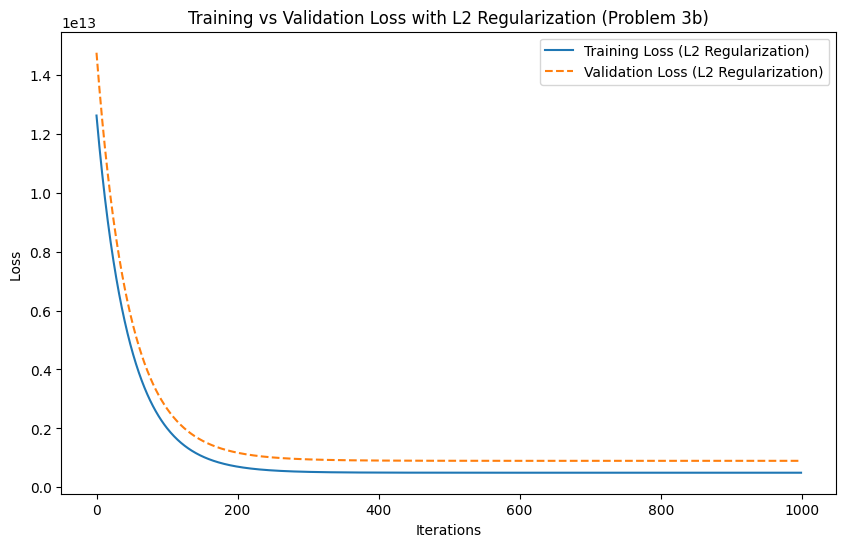

Final Training Loss (L2 Regularization): 496365158296.811
Final Validation Loss (L2 Regularization): 900279141828.3071
Final Training Loss (Baseline - Problem 2b): 496244577550.51044
Final Validation Loss (Baseline - Problem 2b): 900111363844.0188


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'
df = pd.read_csv(url)

df = pd.get_dummies(df, drop_first=True)

features_3b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes',
               'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target_3b = 'price'

X_3b = df[features_3b]
y_3b = df[target_3b]

X_train_3b, X_test_3b, y_train_3b, y_test_3b = train_test_split(X_3b, y_3b, test_size=0.2, random_state=42, shuffle=True)

# Choose the best input scaling approach from Problem 2b (either normalization or standardization)
# For example, let's use standardization (you can replace this with normalization if it was better in Problem 2b)

# standardization
scaler_std = StandardScaler()

X_train_std = scaler_std.fit_transform(X_train_3b)
X_test_std = scaler_std.transform(X_test_3b)

X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_test_std = np.c_[np.ones(X_test_std.shape[0]), X_test_std]

# grad descent regularization
def gradient_descent_l2(X_train, y_train, X_val, y_val, theta, alpha, iterations, lambda_reg):
    m_train = len(y_train)
    m_val = len(y_val)

    training_loss_history = []
    validation_loss_history = []

    for i in range(iterations):
        prediction_train = X_train.dot(theta)
        error_train = prediction_train - y_train

        theta = theta * (1 - alpha * (lambda_reg/m_train)) - (alpha/m_train) * X_train.T.dot(error_train)

        training_loss = (1/(2*m_train)) * np.sum(error_train ** 2) + (lambda_reg/(2*m_train)) * np.sum(theta[1:] ** 2)
        training_loss_history.append(training_loss)

        prediction_val = X_val.dot(theta)
        error_val = prediction_val - y_val
        validation_loss = (1/(2*m_val)) * np.sum(error_val ** 2)
        validation_loss_history.append(validation_loss)

    return theta, training_loss_history, validation_loss_history

theta_l2 = np.zeros(X_train_std.shape[1])

alpha = 0.01
iterations = 1000
lambda_reg = 0.1

theta_l2, training_loss_l2, validation_loss_l2 = gradient_descent_l2(X_train_std, y_train_3b, X_test_std, y_test_3b, theta_l2, alpha, iterations, lambda_reg)

plt.figure(figsize=(10,6))

plt.plot(range(iterations), training_loss_l2, label='Training Loss (L2 Regularization)')
plt.plot(range(iterations), validation_loss_l2, linestyle='--', label='Validation Loss (L2 Regularization)')

plt.xlabel('Iterations')
plt.ylabel('Loss ')
plt.title('Training vs Validation Loss with L2 Regularization (Problem 3b)')
plt.legend()
plt.show()

print(f"Final Training Loss (L2 Regularization): {training_loss_l2[-1]}")
print(f"Final Validation Loss (L2 Regularization): {validation_loss_l2[-1]}")

final_train_loss_2b = training_loss_std[-1]
final_val_loss_2b = validation_loss_std[-1]

print(f"Final Training Loss (Baseline - Problem 2b): {final_train_loss_2b}")
print(f"Final Validation Loss (Baseline - Problem 2b): {final_val_loss_2b}")
